In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


**export data**

In [5]:
df=pd.read_csv('../csv/apartments_db.menzili.csv')
print(df.head())

       prix    delegation gouvernorat  chambres  salle_de_bains  nb_pieces  \
0  175000.0        Ennasr      Ariana         1             1.0        2.0   
1  270000.0       Ghazela      Ariana         2             1.0        3.0   
2  390000.0  Ariana Ville      Ariana         4             2.0        5.0   
3  400000.0  Ariana Ville      Ariana         3             1.0        3.0   
4  345000.0     La Soukra      Ariana         3             2.0        5.0   

   superficie  etage  
0        65.0      1  
1       100.0      3  
2       140.0      5  
3       124.0      1  
4       140.0      2  


**Data description & first peak visualizations**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957 entries, 0 to 1956
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   prix            1957 non-null   float64
 1   delegation      1957 non-null   object 
 2   gouvernorat     1957 non-null   object 
 3   chambres        1957 non-null   int64  
 4   salle_de_bains  1957 non-null   float64
 5   nb_pieces       1957 non-null   float64
 6   superficie      1957 non-null   float64
 7   etage           1957 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 122.4+ KB


**number & percentage of missing values according to columns**

In [7]:
{col: [df[col].isnull().sum(), f'% {np.round(np.mean(df[col].isnull()*100), 3)}'
      ] for col in df.columns if df[col].isnull().any()}

{}

# Clean delegation column

**Tunis**

In [26]:
data_tunis=df[df.gouvernorat == 'Tunis']
print(data_tunis.delegation.unique())
print(len(data_tunis.delegation.unique()))

['La Marsa' 'Cite El Khadra' 'Cité Olympique' 'Centre Ville - Lafayette'
 'Aïn Zaghouan' 'El Ouardia' 'Centre Urbain Nord' 'Kram' 'Aouina'
 'Sidi El Béchir' 'Les Berges Du Lac' 'Mutuelleville' 'Le Bardo'
 'Sidi Daoud' 'Ezzouhour' 'Médina' 'El Omrane' 'La Goulette' 'Ettahrir'
 'Gammarth' 'Agba' 'Sidi Hassine' 'Hraïria' 'Djebel Jelloud'
 'Sidi Bou Said']
25


**replacing with standard names across all dataset**

In [40]:
replacements = {
    'bab bhar': 'Bab Bhar',
    'bab el khadra': 'Bab El Khadra',
    'saadoun': 'Bab Saadoun',
    'bab souika': 'Bab Souika',
    'kram': 'Kram',
    'carthage': 'Kram',
    'cite el khadra': 'Cite El Khadra',
    'Cité Olympique': 'Cite Olympique',
    'lac': 'Les Berges Du Lac',
    'manar': 'El Manar',
    'menzah 1': 'El Menzah 1',
    'menzah 4': 'El Menzah 4',
    'menzah 9': 'El Menzah 9',
    'menzah': 'El Menzah 1',
    'omrane': 'El Omrane',
    'ouardia': 'El Ouardia',
    'ettahrir': 'Ettahrir',
    'hrairia': 'Hrairia',
    'hraïria': 'Hrairia',
    'goulette': 'La Goulette',
    'ain zaghouan': 'Ain Zaghouan',
    'aouina': 'Aouina',
    'gammarth': 'Gammarth',
    'marsa': 'La Marsa',
    'bardo' : 'Le Bardo',
    'montplaisir': 'Montplaisir',
    'sidi hassine': 'Sidi Hassine',
    'montfleury': 'Montfleury',
    'tunis': 'El Ouardia',
    'centre ville - lafayette': 'Centre Ville',
    'medina': 'Centre Ville',
    'sidi el bechir': 'Sidi El Bechir',
}

# Convert to lowercase, replace substrings, and map to replacement values
def replace_delegation(delegation):
    if delegation is np.nan:
        delegation= 'marsa'
    delegation_lower = delegation.lower().replace('é', 'e')
    
    for substring, replacement in replacements.items():
        if substring in delegation_lower:
            return replacement
    return delegation  

df['delegation'] = df['delegation'].apply(replace_delegation)

In [ ]:
data_tunis=df[df.gouvernorat == 'Tunis'] #tunis
print(data_tunis.delegation.unique())
print(len(data_tunis.delegation.unique()))

['Ariana Ville' 'Cite El Khadra' 'Cité Olympique' 'Centre Ville'
 'Aïn Zaghouan' 'El Ouardia' 'Centre Urbain Nord' 'Aouina'
 'Sidi El Bechir' 'Les Berges Du Lac' 'Mutuelleville' 'Le Bardo'
 'Sidi Daoud' 'Ezzouhour' 'El Omrane' 'La Goulette' 'Ettahrir' 'Gammarth'
 'Agba' 'Sidi Hassine' 'Hrairia' 'Djebel Jelloud' 'Sidi Bou Said']
23


**Ariana**

In [ ]:
data_ariana=df[df.gouvernorat == 'Ariana'] #ariana
print(data_ariana.delegation.unique())
print(len(data_ariana.delegation.unique()))

['Cite Ennasr' 'Cite El Ghazela' 'Ariana Ville' 'La Soukra' 'El Menzah 1'
 'Raoued' 'Borj Louzir' 'El Manar' 'Chotrana' 'Kalaât El Andalous'
 'Ettadhamen']
11


In [29]:
replacements = {
    'soukra': 'La Soukra',
    'ghazela': 'Cite El Ghazela',
    'ennasr': 'Cite Ennasr',
    'Ennasr': 'Cite Ennasr',
    'raoued': 'Raoued',
    'kalaat landalous': 'Kalaat Landalous',
    'sidi thabet': 'Ariana Ville',
    'mnihla': 'Ariana Ville',
    'menzah 6': 'El Menzah 6',
    'menzah 7': 'El Menzah 7',
    'menzah 5': 'El Menzah 5',
    'menzah 8': 'El Menzah 8',
    'menzah': 'El Menzah 7',
    'kram': 'Ariana Ville',
    'marsa': 'Ariana Ville',
    'ariana': 'Ariana Ville'

}


# Convert to lowercase, replace substrings, and map to replacement values
def replace_delegation(delegation):
    if delegation is np.nan:
        delegation= 'marsa'
    delegation_lower = delegation.lower().replace('é', 'e')
    
    for substring, replacement in replacements.items():
        if substring in delegation_lower:
            return replacement
    return delegation 

df['delegation'] = df['delegation'].apply(replace_delegation)


In [30]:
data_ariana=df[df.gouvernorat == 'Ariana']
print(data_ariana.delegation.unique())
print(len(data_ariana.delegation.unique()))

['Cite Ennasr' 'Cite El Ghazela' 'Ariana Ville' 'La Soukra' 'El Menzah 7'
 'Raoued' 'Borj Louzir' 'El Manar' 'Chotrana' 'Kalaât El Andalous'
 'Ettadhamen']
11


**Ben arouss**

In [ ]:
df_benarous=df[df.gouvernorat == 'Ben Arous'] #ben-arous

print(df_benarous.delegation.unique())
print(len(df_benarous.delegation.unique()))

['Ezzahra' 'Centre Ville' 'Mohamedia' 'Borj Cedria' 'Radès' 'Hammam Chott'
 'El Mourouj' 'Fouchana' 'Hammam Lif' 'Mégrine' 'Mornag' 'Boumhel']
12


In [44]:
replacements = {
    'mourouj': 'El Mourouj',
    'fouchana': 'Fouchana',
    'boumhel': 'Boumhel',
    'mornag': 'Mornag',
    'rades': 'Rades',
    'borj cedria': 'Borj Cedria',
    'ezzahra': 'Ezzahra',
    'hammam': 'Hammam Lif',
    'mohamadia': 'Mohamadia',   
    'ben arous': 'Ben Arous',
    'medina': 'Ben Arous',
    'megrine': 'Megrine',
    'radès': 'Rades',
    'centre ville': 'Ben Arous',
    'mohamedia': 'Ben Arous'
   }


# Convert to lowercase, replace substrings, and map to replacement values
def replace_delegation(delegation):
    delegation_lower = delegation.lower().replace('é', 'e')
    
    for substring, replacement in replacements.items():
        if substring in delegation_lower:
            return replacement
    return delegation  

df['delegation'] = df['delegation'].apply(replace_delegation)


In [45]:
df_benarous=df[df.gouvernorat == 'Ben Arous']
print(df_benarous.delegation.unique())
print(len(df_benarous.delegation.unique()))

['Ezzahra' 'Ben Arous' 'Borj Cedria' 'Rades' 'Hammam Lif' 'El Mourouj'
 'Fouchana' 'Megrine' 'Mornag' 'Boumhel']
10


**Manouba**

In [46]:
df_manouba=df[df.gouvernorat == 'la-manouba']
print(df_manouba.delegation.unique())
print(len(df_manouba.delegation.unique()))

[]
0


In [54]:
# 'tunis', 'ariana', 'ben-arous', 'la-manouba'
df['gouvernorat'] = df['gouvernorat'].replace('Tunis', 'tunis')
df['gouvernorat'] = df['gouvernorat'].replace('Ariana', 'ariana')
df['gouvernorat'] = df['gouvernorat'].replace('Ben Arous', 'ben-arous')

In [55]:
df['gouvernorat'].unique()

array(['ariana', 'tunis', 'ben-arous'], dtype=object)

**save current progress**

In [56]:
df.to_csv('../csv/after_cleaning/menzili_preprocessed.csv', index=False)

# Clean superficie column

In [57]:
print(df.superficie.describe())

count      1957.000000
mean        178.262040
std        2485.507391
min           1.000000
25%          84.000000
50%         110.000000
75%         140.000000
max      110000.000000
Name: superficie, dtype: float64


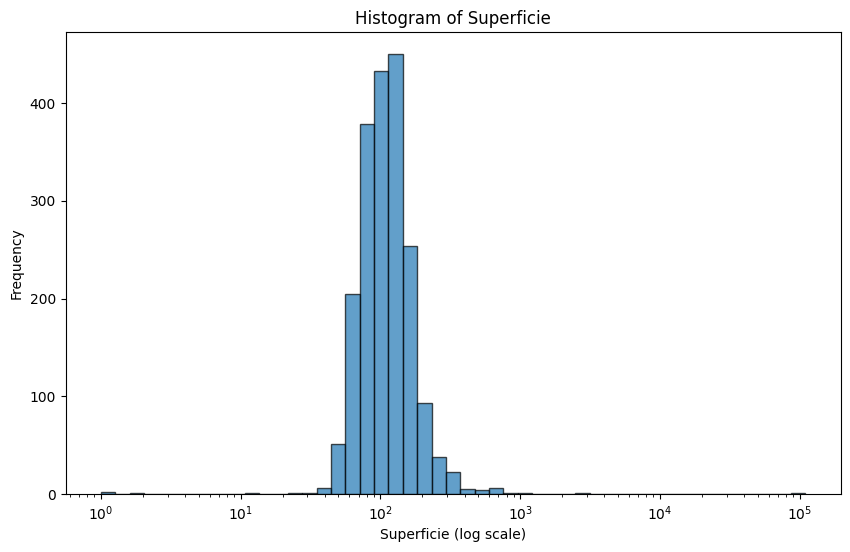

In [58]:

data = df['superficie'] 
bins = np.logspace(np.log10(data.min()), np.log10(data.max()), 50)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=bins, edgecolor='k', alpha=0.7)
plt.xscale('log')
plt.xlabel('Superficie (log scale)')
plt.ylabel('Frequency')
plt.title('Histogram of Superficie')
plt.show()


**handling noise & outliers**

-> DECISION: min superficie 30 m²  max is 300 m²

**count outliers and handle outliers**

In [59]:
count = 0  

def round_up(value):
    global count  
    if value < 30:
        count += 1
        return 30
    elif value > 300:
        count += 1
        return 300
    return value 

df['superficie'] = df['superficie'].apply(round_up)

print(count)


42


In [60]:
print(df.superficie.describe())

count    1957.000000
mean      118.328468
std        50.123812
min        30.000000
25%        84.000000
50%       110.000000
75%       140.000000
max       300.000000
Name: superficie, dtype: float64


**save current progress**

In [62]:
df.to_csv('../csv/after_cleaning/menzili_preprocessed.csv', index=False)

# Clean etage column

In [63]:
df['etage'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1957 entries, 0 to 1956
Series name: etage
Non-Null Count  Dtype
--------------  -----
1957 non-null   int64
dtypes: int64(1)
memory usage: 15.4 KB


# Clean salle de bain column

In [65]:
df['salle_de_bains'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1957 entries, 0 to 1956
Series name: salle_de_bains
Non-Null Count  Dtype  
--------------  -----  
1957 non-null   float64
dtypes: float64(1)
memory usage: 15.4 KB


In [66]:
df['salle_de_bains'] = df['salle_de_bains'].astype('Int64')  # Convert to integer while allowing NaN

print(df['salle_de_bains'].head())


0    1
1    1
2    2
3    1
4    2
Name: salle_de_bains, dtype: Int64


**handle missing value: if missing we can assume only 1 salle de bain**

In [67]:
df['salle_de_bains'] = df['salle_de_bains'].fillna(1)

**save current progress**

In [68]:
df.to_csv('../csv/after_cleaning/menzili_preprocessed.csv', index=False)

# Clean chambre column

In [69]:
df['chambres'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1957 entries, 0 to 1956
Series name: chambres
Non-Null Count  Dtype
--------------  -----
1957 non-null   int64
dtypes: int64(1)
memory usage: 15.4 KB


# Clean price values

In [70]:
print(df.prix.describe())

count    1.957000e+03
mean     3.025421e+05
std      2.883656e+05
min      3.000000e+04
25%      1.600000e+05
50%      2.350000e+05
75%      3.500000e+05
max      4.990000e+06
Name: prix, dtype: float64


In [71]:
count = (df['prix'] >900000).sum() 
print(count)

48


In [72]:
count = (df['prix'] <100000).sum() 
print(count)

# print(df[df['prix'] < 100000])
# df[df['prix'] < 100000].to_csv('../csv/after_cleaning/out.csv', index=False)

110


In [73]:
df.iloc[(df['prix'] <100000).values, df.columns.get_loc('prix')] = 100000

In [74]:
df['prix'].isna().sum()

0

In [75]:
df.to_csv('../csv/after_cleaning/menzili_preprocessed.csv', index=False)

# One hot encoding for gouvernorat

In [75]:
# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[['gouvernorat']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['gouvernorat']))

# Align indices before concatenating
one_hot_df.index = df.index

# Concatenate and drop the original column
df_encoded = pd.concat([df, one_hot_df], axis=1)
df = df_encoded.drop('gouvernorat', axis=1)

In [ ]:
df.to_csv('../csv/after_cleaning/menzili_preprocessed.csv', index=False)

**make price last column**

In [76]:
# Reorder columns to make 'prix' the last column
cols = [col for col in df.columns if col != 'prix'] + ['prix']
df = df[cols]

df.to_csv('../csv/after_cleaning/menzili_preprocessed.csv', index=False)